In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("/content/sample_data/alexa_reviews.tsv",sep="\t")  #sep mean separator =\t means tab  
df.head()

,Unnamed: 0,verified_reviews,feedback
0,0,Love my Echo!,1
1,1,Loved it!,1
2,2,"Sometimes while playing a game, you can answer...",1
3,3,I have had a lot of fun with this thing. My 4 ...,1
4,4,Music,1


In [3]:
df.shape

(3150, 3)

In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [6]:
df.isnull().sum()

verified_reviews    0
feedback            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  3150 non-null   object
 1   feedback          3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [8]:
df.describe()

,feedback
count,3150.000000
mean,0.918413
std,0.273778
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
df['length'] = df['verified_reviews'].apply(len)
df.groupby('length').describe().sample(10)

feedback                                              
          count      mean       std  min   25%  50%  75%  max
length                                                       
19         26.0  0.961538  0.196116  0.0  1.00  1.0  1.0  1.0
91         13.0  0.923077  0.277350  0.0  1.00  1.0  1.0  1.0
467         2.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0
147         7.0  0.857143  0.377964  0.0  1.00  1.0  1.0  1.0
192         7.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0
405         2.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0
690         1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0
176         4.0  0.750000  0.500000  0.0  0.75  1.0  1.0  1.0
197         5.0  0.400000  0.547723  0.0  0.00  0.0  1.0  1.0
1          81.0  0.765432  0.426369  0.0  1.00  1.0  1.0  1.0

In [10]:
df.groupby('feedback').describe()

length                                                         
           count        mean         std  min   25%    50%    75%     max
feedback                                                                 
0          257.0  215.241245  236.325955  1.0  53.0  137.0  289.0  1686.0
1         2893.0  124.659177  174.624491  1.0  29.0   69.0  154.0  2851.0

In [11]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

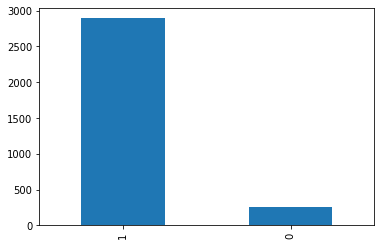

In [12]:
df['feedback'].value_counts().plot.bar()

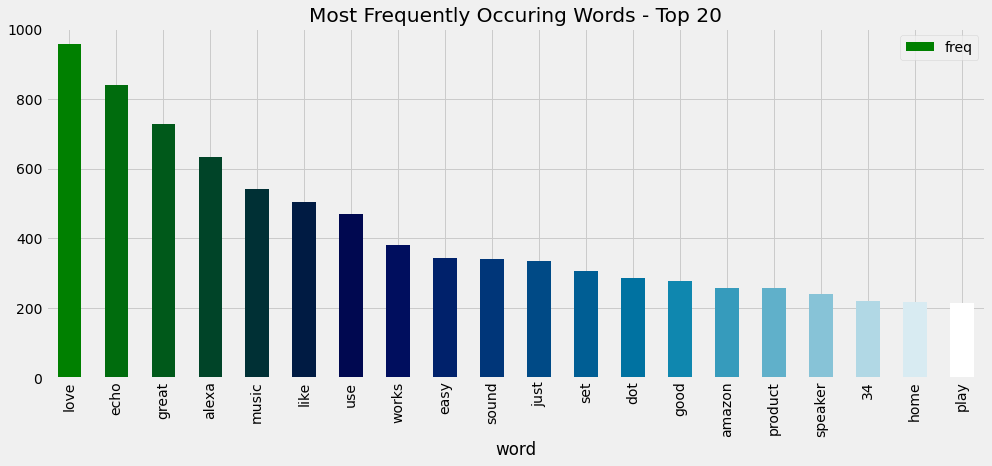

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

In [14]:
import nltk
#one time
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

In [16]:
from wordcloud import WordCloud

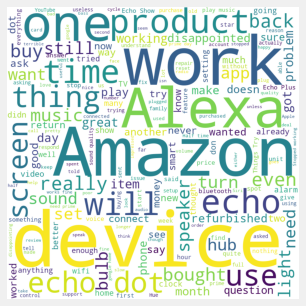

In [17]:
wc=WordCloud(height=800,width=800,background_color="white",min_font_size=10)
wc.generate(" ".join(df[df["feedback"]==0]["verified_reviews"]))
plt.figure(figsize=(15,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

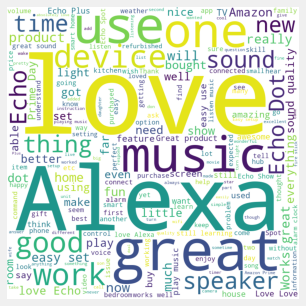

In [18]:
wc=WordCloud(height=800,width=800,background_color="white",min_font_size=10)
wc.generate(" ".join(df[df["feedback"]==1]["verified_reviews"]))
plt.figure(figsize=(15,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [19]:
def clean_text(text):
  stop=stopwords.words('english')
  punc=list(punctuation)
  bad_token=stop+punc
  token1=word_tokenize(text.lower())
  token2=[t for t in token1 if t.isalpha()]
  lemma=WordNetLemmatizer()
  token3=[lemma.lemmatize(t) for t in token2 if t not in bad_token]
  return " ".join(token3)

In [20]:
df["verified_reviews"]=df["verified_reviews"].apply(clean_text)

In [21]:
df["verified_reviews"]

0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3       lot fun thing yr old learns dinosaur control l...
4                                                   music
                              ...                        
3145                           perfect kid adult everyone
3146    listening music searching location checking ti...
3147    love thing running entire home tv light thermo...
3148    complaint sound quality great mostly use comma...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [22]:
x=df["verified_reviews"]
y=df["feedback"]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [25]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:
ros=RandomOverSampler()

In [27]:
sent_len=[]
for sent in df["verified_reviews"]:
  sent_len.append(len(word_tokenize(sent)))

df["sent_len"]=sent_len
df.head()

,verified_reviews,feedback,length,sent_len
0,love echo,1,13,2
1,loved,1,9,1
2,sometimes playing game answer question correct...,1,195,17
3,lot fun thing yr old learns dinosaur control l...,1,172,18
4,music,1,5,1


In [28]:
max(sent_len)

245

In [29]:
np.quantile(sent_len,0.95)

40.0

In [30]:
max_len=40

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [32]:
tok=Tokenizer(char_level=False,split=" ")
tok.fit_on_texts(x_train)

In [33]:
tok.index_word

{1: 'love',
 2: 'echo',
 3: 'great',
 4: 'alexa',
 5: 'work',
 6: 'music',
 7: 'like',
 8: 'use',
 9: 'sound',
 10: 'one',
 11: 'easy',
 12: 'device',
 13: 'dot',
 14: 'speaker',
 15: 'set',
 16: 'good',
 17: 'product',
 18: 'get',
 19: 'amazon',
 20: 'thing',
 21: 'time',
 22: 'would',
 23: 'play',
 24: 'home',
 25: 'show',
 26: 'light',
 27: 'still',
 28: 'really',
 29: 'bought',
 30: 'smart',
 31: 'new',
 32: 'much',
 33: 'better',
 34: 'quality',
 35: 'day',
 36: 'prime',
 37: 'also',
 38: 'well',
 39: 'need',
 40: 'fun',
 41: 'far',
 42: 'room',
 43: 'alarm',
 44: 'even',
 45: 'could',
 46: 'got',
 47: 'screen',
 48: 'tv',
 49: 'plus',
 50: 'house',
 51: 'everything',
 52: 'able',
 53: 'turn',
 54: 'ask',
 55: 'video',
 56: 'feature',
 57: 'learning',
 58: 'hub',
 59: 'buy',
 60: 'know',
 61: 'make',
 62: 'spot',
 63: 'little',
 64: 'used',
 65: 'lot',
 66: 'using',
 67: 'want',
 68: 'weather',
 69: 'voice',
 70: 'see',
 71: 'nice',
 72: 'say',
 73: 'tell',
 74: 'price',
 75: 'wit

In [34]:
sequence_train=tok.texts_to_sequences(x_train)

In [35]:
sequence_matrix_train=sequence.pad_sequences(sequence_train,maxlen=max_len)

In [36]:
sequence_matrix_train

array([[   0,    0,    0, ...,    0,    1,    4],
       [   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,  173,    1,    1],
       ...,
       [   0,    0,    0, ...,  180,   83,  264],
       [   0,    0,    0, ...,   91, 1912,  211],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [37]:
sequence_matrix_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4], dtype=int32)

In [38]:
sequence_matrix_train[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [39]:
vocab_len=len(tok.index_word)
print(vocab_len)

3191


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM
from keras import regularizers

In [41]:
model=Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(LSTM(128,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
trained_model=model.fit(sequence_matrix_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 11s 122ms/step - loss: 1.2184 - accuracy: 0.9097 - val_loss: 0.4554 - val_accuracy: 0.9187
Epoch 2/50
63/63 [==============================] - 6s 97ms/step - loss: 0.2636 - accuracy: 0.9241 - val_loss: 0.2383 - val_accuracy: 0.9306
Epoch 3/50
63/63 [==============================] - 6s 96ms/step - loss: 0.1327 - accuracy: 0.9514 - val_loss: 0.2572 - val_accuracy: 0.9365
Epoch 4/50
63/63 [==============================] - 6s 97ms/step - loss: 0.0888 - accuracy: 0.9673 - val_loss: 0.2396 - val_accuracy: 0.9266
Epoch 5/50
63/63 [==============================] - 6s 95ms/step - loss: 0.0694 - accuracy: 0.9792 - val_loss: 0.2984 - val_accuracy: 0.9385
Epoch 6/50
63/63 [==============================] - 6s 96ms/step - loss: 0.0567 - accuracy: 0.9856 - val_loss: 0.2860 - val_accuracy: 0.9286
Epoch 7/50
63/63 [==============================] - 6s 99ms/step - loss: 0.0793 - accuracy: 0.9767 - val_loss: 0.2640 - val_accuracy: 0.9226
Epoch 8/50


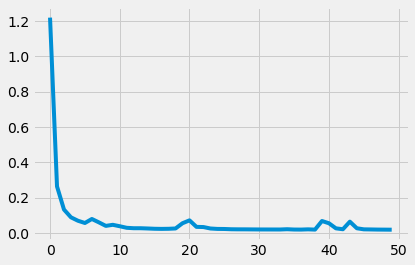

In [44]:
plt.plot(trained_model.history['loss'])
plt.show()

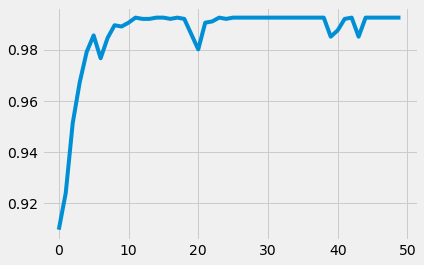

In [45]:
plt.plot(trained_model.history['accuracy'])
plt.show()

In [46]:
x_test

422                           simple set music everywhere
1581                                                     
1185                        think dot listens better spot
683     brand new echo dot thought refurbished would g...
305                   great music little hard figure work
                              ...                        
1276    love little dot screen super easy set easy use...
3099                                          good device
841     alexa since beginning accidentally spilled wat...
44                                                  great
615     took little work set finally got sound quality...
Name: verified_reviews, Length: 630, dtype: object

In [47]:
x_matrix_test=sequence.pad_sequences(tok.texts_to_sequences(x_test))

In [48]:
y_pred=model.predict(x_matrix_test)
import warnings
warnings.filterwarnings('ignore')

In [49]:
y_pred=np.where(y_pred>0.5,1,0)
print(y_pred[0:5])

[[1]
 [1]
 [0]
 [0]
 [1]]


In [50]:
print(y_test[0:5])

422     1
1581    1
1185    1
683     1
305     1
Name: feedback, dtype: int64


In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,y_pred))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.37      0.44        54
           1       0.94      0.97      0.96       576

    accuracy                           0.92       630
   macro avg       0.75      0.67      0.70       630
weighted avg       0.91      0.92      0.91       630


Confusion Matrix
[[ 20  34]
 [ 16 560]]


In [53]:
stop=stopwords.words('english') 



In [54]:
def clean_text(text):
    stop = stopwords.words('english') #stopwords list
    punc = list(punctuation) #punctuation list
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text) # tokenization
    word_tokens = [t for t in tokens if t.isalpha()] # removing numbers 
    # lemmatization,  stopwords & punctuation removal, to lower case
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [55]:
df.head()

,verified_reviews,feedback,length,sent_len
0,love echo,1,13,2
1,loved,1,9,1
2,sometimes playing game answer question correct...,1,195,17
3,lot fun thing yr old learns dinosaur control l...,1,172,18
4,music,1,5,1


In [56]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['verified_reviews'].apply(pol)
df['subjectivity'] = df['verified_reviews'].apply(sub)
df

,verified_reviews,feedback,length,sent_len,polarity,subjectivity
0,love echo,1,13,2,0.500000,0.600000
1,loved,1,9,1,0.700000,0.800000
2,sometimes playing game answer question correct...,1,195,17,0.000000,0.656250
3,lot fun thing yr old learns dinosaur control l...,1,172,18,0.233333,0.483333
4,music,1,5,1,0.000000,0.000000
...,...,...,...,...,...,...
3145,perfect kid adult everyone,1,50,4,0.550000,0.650000
3146,listening music searching location checking ti...,1,135,13,0.250000,0.428571
3147,love thing running entire home tv light thermo...,1,441,42,0.251190,0.547619
3148,complaint sound quality great mostly use comma...,1,380,33,0.356250,0.586111


In [57]:
x=df["verified_reviews"]
y=df["feedback"]

In [58]:
df["feedback"].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [59]:
def encode(A): #user defined function
    index={"spam":1 ,"not spam":0}
    return index[A]

In [60]:
#train test split (70-30%  , 75-25% and 80%-20%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [61]:
cv=CountVectorizer()

In [62]:
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)
print(x_train_cv)

  (0, 1159)	1
  (0, 2106)	2
  (0, 1181)	1
  (0, 2514)	1
  (1, 88)	1
  (1, 2281)	1
  (2, 491)	1
  (2, 1737)	1
  (3, 2645)	1
  (3, 2315)	1
  (3, 1999)	1
  (3, 2864)	1
  (3, 2376)	1
  (3, 1226)	1
  (3, 331)	1
  (3, 2970)	1
  (3, 292)	1
  (3, 2835)	1
  (3, 2723)	1
  (4, 911)	1
  (5, 1601)	1
  (5, 1045)	1
  (5, 2591)	1
  (5, 121)	1
  (5, 656)	1
  :	:
  (2512, 940)	1
  (2512, 853)	2
  (2512, 2744)	1
  (2512, 2121)	1
  (2513, 1601)	1
  (2513, 853)	1
  (2514, 1601)	1
  (2514, 121)	1
  (2514, 1844)	1
  (2514, 2054)	1
  (2514, 679)	1
  (2514, 2840)	1
  (2514, 1137)	2
  (2514, 1478)	2
  (2514, 1582)	1
  (2514, 2784)	1
  (2516, 1601)	1
  (2516, 4)	1
  (2517, 1181)	2
  (2517, 2065)	1
  (2517, 684)	1
  (2518, 1545)	1
  (2519, 1601)	1
  (2519, 2556)	1
  (2519, 853)	1


In [63]:
from sklearn.tree import DecisionTreeClassifier


In [64]:
dt=DecisionTreeClassifier()

In [65]:
dt.fit(x_train_cv,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
y_pred=dt.predict(x_test_cv)

In [67]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        46
           1       0.96      0.96      0.96       584

    accuracy                           0.93       630
   macro avg       0.74      0.74      0.74       630
weighted avg       0.93      0.93      0.93       630



In [68]:

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 24  22]
 [ 22 562]]


In [69]:
tf=TfidfVectorizer() 
x_train_tf=tf.fit_transform(x_train)
x_test_tf=tf.transform(x_test)
print(x_train_tf)

  (0, 2514)	0.3223757129411405
  (0, 1181)	0.26823069091133883
  (0, 2106)	0.832015398008537
  (0, 1159)	0.3631481428227512
  (1, 2281)	0.9226143635683965
  (1, 88)	0.38572365255099744
  (2, 1737)	0.46763762622214533
  (2, 491)	0.8839202738603279
  (3, 2723)	0.29074286184740816
  (3, 2835)	0.22730295334178882
  (3, 292)	0.20358424722128782
  (3, 2970)	0.2955693687273989
  (3, 331)	0.39163951231560906
  (3, 1226)	0.41217226273007673
  (3, 2376)	0.17368168423337488
  (3, 2864)	0.26723042889781323
  (3, 1999)	0.2955693687273989
  (3, 2315)	0.23000439345471851
  (3, 2645)	0.41217226273007673
  (4, 911)	1.0
  (5, 2375)	0.48626615325024863
  (5, 656)	0.5429897801945177
  (5, 121)	0.30299469921445993
  (5, 2591)	0.41312066095431393
  (5, 1045)	0.41312066095431393
  :	:
  (2512, 853)	0.362541402599512
  (2512, 940)	0.4226068512130017
  (2512, 2840)	0.33176933533728914
  (2512, 342)	0.27002262254387327
  (2513, 853)	0.755391331757602
  (2513, 1601)	0.655273939589754
  (2514, 2784)	0.35407958196

In [70]:
dt1=DecisionTreeClassifier()

In [71]:
dt1.fit(x_train_tf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
y_pred1=dt.predict(x_test_tf)

In [73]:
print(classification_report(y_test,y_pred1))
print("Confusion MAtrix :")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.09      0.15        46
           1       0.93      0.99      0.96       584

    accuracy                           0.93       630
   macro avg       0.69      0.54      0.55       630
weighted avg       0.90      0.93      0.90       630

Confusion MAtrix :
[[ 24  22]
 [ 22 562]]


In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [75]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(x_train_cv.shape[1],)))#hidden layer
model.add(Dense(6,activation='relu')) #hidden layer2
model.add(Dense(1,activation='sigmoid')) #output layer

In [76]:
x_train_cv=x_train_cv.toarray() #in neural network ,strictly you should convert the transform
#version into array of X_train_cv and X_test_cv
x_test_cv=x_test_cv.toarray()

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                30660     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 30,733
Trainable params: 30,733
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
trained_model=model.fit(x_train_cv,y_train,batch_size=10,epochs=20)

Epoch 1/20
252/252 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.8869
Epoch 2/20
252/252 [==============================] - 1s 2ms/step - loss: 0.2823 - accuracy: 0.9163
Epoch 3/20
252/252 [==============================] - 1s 2ms/step - loss: 0.1679 - accuracy: 0.9409
Epoch 4/20
252/252 [==============================] - 1s 2ms/step - loss: 0.1032 - accuracy: 0.9639
Epoch 5/20
252/252 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9730
Epoch 6/20
252/252 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9817
Epoch 7/20
252/252 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9877
Epoch 8/20
252/252 [==============================] - 1s 2ms/step - loss: 0.0345 - accuracy: 0.9885
Epoch 9/20
252/252 [==============================] - 1s 2ms/step - loss: 0.0300 - accuracy: 0.9905
Epoch 10/20
252/252 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9917

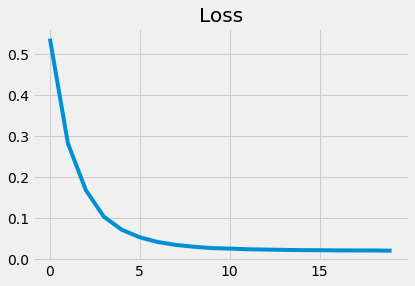

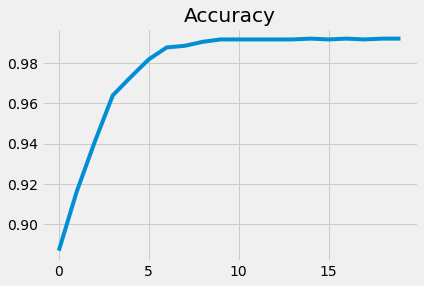

In [80]:
plt.title("Loss")
plt.plot(trained_model.history['loss'])
plt.show()
plt.title("Accuracy")
plt.plot(trained_model.history['accuracy'])
plt.show()

In [81]:
import numpy as np
#Test the model
y_pred=model.predict(x_test_cv)
print(y_pred)
y_pred=np.where(y_pred>=0.5,1,0)
print(y_pred)

[[2.40974814e-01]
 [9.99999583e-01]
 [9.99974370e-01]
 [9.99994397e-01]
 [9.99998033e-01]
 [9.99970794e-01]
 [9.98893380e-01]
 [9.99838591e-01]
 [9.99706507e-01]
 [9.99989569e-01]
 [9.99998629e-01]
 [9.99882698e-01]
 [9.97262716e-01]
 [9.99994040e-01]
 [9.96562123e-01]
 [9.99995470e-01]
 [1.00000000e+00]
 [9.98825192e-01]
 [1.00000000e+00]
 [9.99993920e-01]
 [9.99999166e-01]
 [9.99998689e-01]
 [9.99922514e-01]
 [9.99975979e-01]
 [9.99926686e-01]
 [9.99882102e-01]
 [9.99818802e-01]
 [9.93656874e-01]
 [1.00000000e+00]
 [9.98507977e-01]
 [1.00000000e+00]
 [9.96904135e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99706507e-01]
 [1.00000000e+00]
 [9.97150779e-01]
 [9.99900341e-01]
 [9.99995589e-01]
 [9.97910142e-01]
 [9.98617411e-01]
 [9.99999881e-01]
 [9.99996781e-01]
 [9.99873102e-01]
 [9.96062458e-01]
 [9.96099114e-01]
 [9.99992251e-01]
 [9.99288082e-01]
 [1.00000000e+00]
 [6.13529623e-01]
 [9.93966877e-01]
 [9.99994874e-01]
 [1.00000000e+00]
 [9.99705851e-01]
 [9.99829829e-01]
 [9.999581

In [82]:
print(classification_report(y_test,y_pred))
print("Confusion MAtrix :")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.48      0.56        46
           1       0.96      0.98      0.97       584

    accuracy                           0.95       630
   macro avg       0.82      0.73      0.77       630
weighted avg       0.94      0.95      0.94       630

Confusion MAtrix :
[[ 22  24]
 [ 10 574]]
